- Train set size: 1117957 
- Test set size: 745305 
- No null values in train and test set
- 20 feature columns, all having integer values in a limited range ( 1 to 18). Thus features can be treated as categorical.
- Train and test distributions are similar. 
- All features are negatively correlated to one another. Also the magnitude of correlation is close to 0. So features can be considered as independent of one another.
- All features are positively correlated to the target with correlation varying between 0.18 and 0.19. Thus all features are important for target prediction
- The target is continuous and has a normal distribution with 83 unique values ranging between 0.285 and 0.725 with mean 0.5 and stdev 0.05

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/bk_anupam/anaconda3/envs/fastai/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bk_anupam/anaconda3/envs/fastai/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df_train = pd.read_csv("./data/train.csv", index_col='id')
df_test = pd.read_csv("./data/test.csv", index_col='id')


In [3]:
feature_cols = df_test.columns.to_list()
target_col = "FloodProbability"

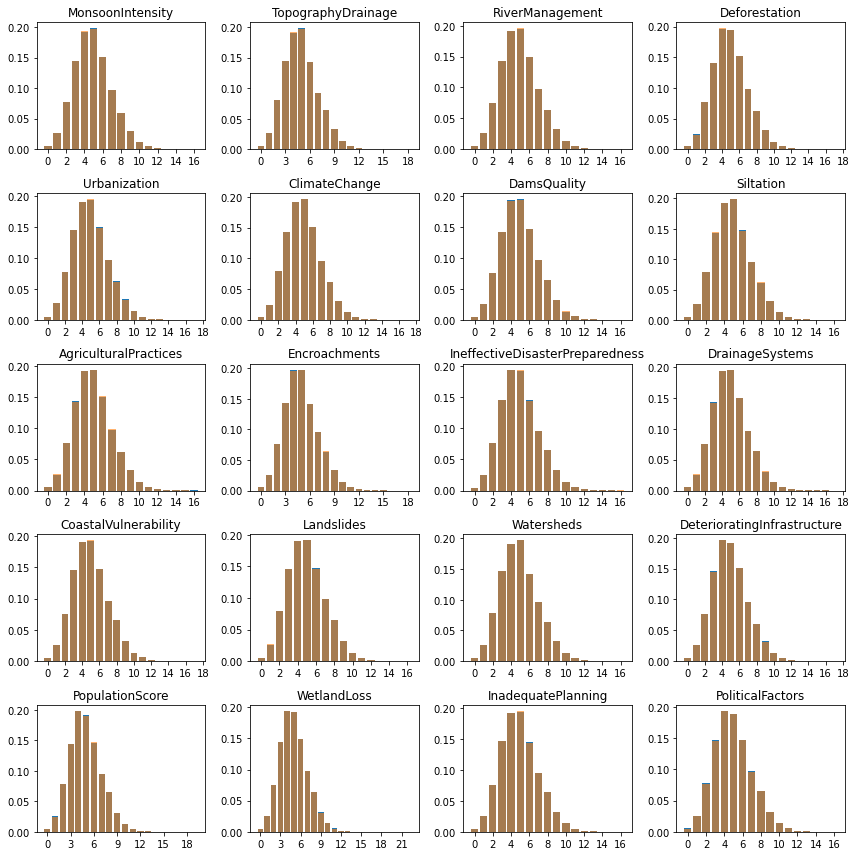

In [4]:
from matplotlib.ticker import MaxNLocator

initial_features = list(df_test.columns)

_, axs = plt.subplots(5, 4, figsize=(12, 12))
for col, ax in zip(initial_features, axs.ravel()):
    vc = df_train[col].value_counts() / len(df_train)
    ax.bar(vc.index, vc)
    vc = df_test[col].value_counts() / len(df_test)
    ax.bar(vc.index, vc, alpha=0.6)
    ax.set_title(col)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
plt.tight_layout()
plt.show()

In [5]:
df_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [6]:
df_test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [7]:
df_train.dtypes.value_counts()

int64      20
float64     1
Name: count, dtype: int64

In [8]:
train_corr = df_train.corr()
train_corr

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


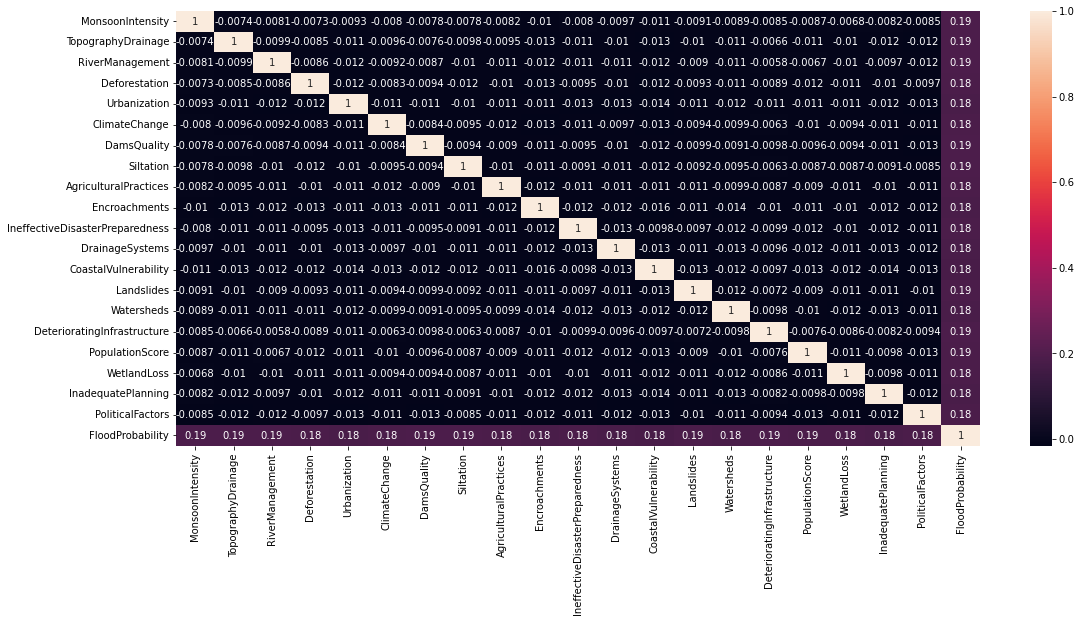

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.heatmap(train_corr, xticklabels=train_corr.columns.values, yticklabels=train_corr.columns.values, annot=True, ax = ax)

In [10]:
# Flood probability is a float value between 0.285 and 0.725
df_train.FloodProbability.describe()

count    1.117957e+06
mean     5.044803e-01
std      5.102610e-02
min      2.850000e-01
25%      4.700000e-01
50%      5.050000e-01
75%      5.400000e-01
max      7.250000e-01
Name: FloodProbability, dtype: float64

In [18]:
# get the count of unique items in FloodProbability column
df_train.FloodProbability.nunique()

83

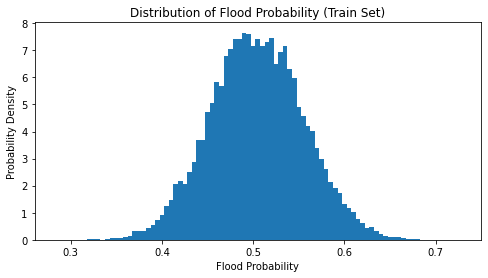

In [20]:
# plot feature distribution of target column on train set
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_train.FloodProbability, bins=np.linspace(0.2825, 0.7275, 90), density=True)
# Set labels for x and y-axis
ax.set_xlabel('Flood Probability')
ax.set_ylabel('Probability Density')
# Add a title (optional)
ax.set_title('Distribution of Flood Probability (Train Set)')
plt.show()

In [26]:
df_train['fsum'] = df_train[feature_cols].sum(axis=1)

In [28]:
df_train.fsum.nunique()

82

In [67]:
df_train['fmean'] = df_train[feature_cols].mean(axis=1)

In [68]:
df_train.fmean.nunique()

82

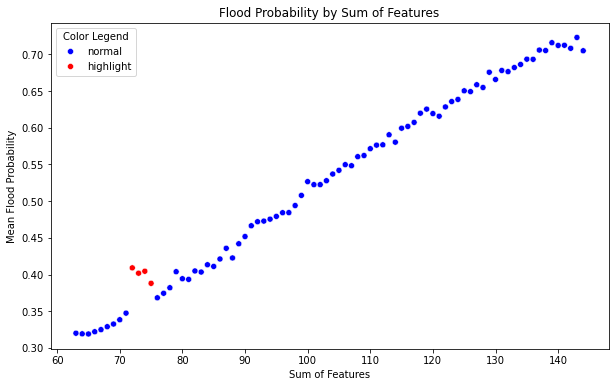

In [39]:
fp_bysum = df_train.FloodProbability.groupby(df_train.fsum).mean()
# Convert the Series to a DataFrame for easier plotting
fp_bysum_df = fp_bysum.reset_index()
fp_bysum_df.columns = ['fsum', 'mean_flood_probability']
# Create a new column to specify the color
fp_bysum_df['color'] = ['highlight' if 72 <= x <= 75 else 'normal' for x in fp_bysum_df['fsum']]

# Plot the scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fsum', y='mean_flood_probability', hue='color', data=fp_bysum_df, palette={'highlight': 'red', 'normal': 'blue'})
plt.title('Flood Probability by Sum of Features')
plt.xlabel('Sum of Features')
plt.ylabel('Mean Flood Probability')
plt.legend(title='Color Legend')
plt.show()

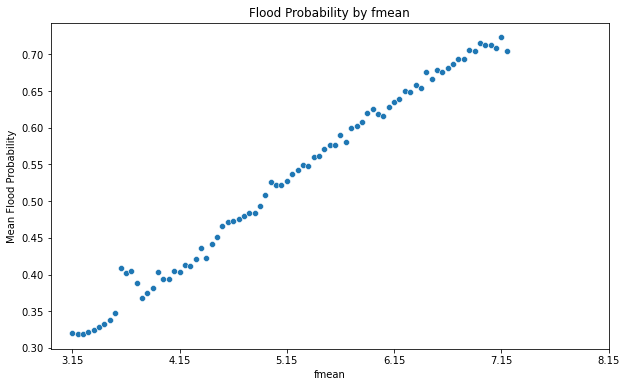

In [69]:
col = 'fmean'
fp_by_col = df_train.FloodProbability.groupby(df_train[col]).mean()
# Convert the Series to a DataFrame for easier plotting
fp_bycol_df = fp_by_col.reset_index()
fp_bycol_df.columns = [col, 'mean_flood_probability']
# Plot the scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='mean_flood_probability', data=fp_bycol_df)
plt.title(f'Flood Probability by {col}')
# Set x-axis to integer values only
x_ticks = np.arange(fp_bycol_df[col].min(), fp_bycol_df[col].max() + 1, 1)
plt.xticks(x_ticks)
plt.xlabel(col)
plt.ylabel('Mean Flood Probability')
plt.show()

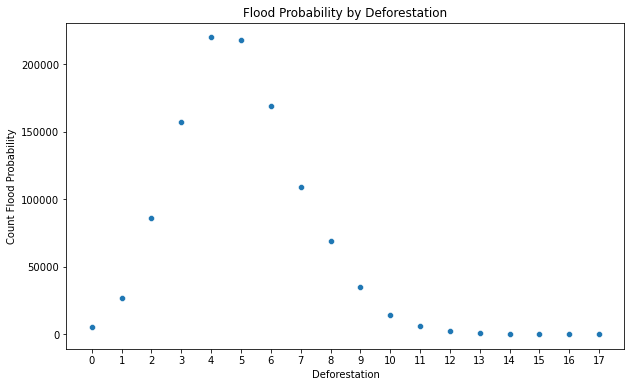

In [55]:
col = 'Deforestation'
fp_by_col = df_train.FloodProbability.groupby(df_train[col]).count()
# Convert the Series to a DataFrame for easier plotting
fp_bycol_df = fp_by_col.reset_index()
fp_bycol_df.columns = [col, 'count_flood_probability']
# Plot the scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='count_flood_probability', data=fp_bycol_df)
plt.title(f'Flood Probability by {col}')
# Set x-axis to integer values only
x_ticks = np.arange(fp_bycol_df[col].min(), fp_bycol_df[col].max() + 1, 1)
plt.xticks(x_ticks)
plt.xlabel(col)
plt.ylabel('Count Flood Probability')
plt.show()

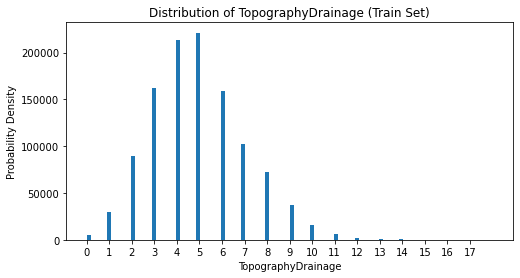

In [65]:
# draw histplot for TopographyDrainage
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_train['TopographyDrainage'], bins=100)
# Set x-axis to integer values only
x_ticks = np.arange(df_train[col].min(), df_train[col].max() + 1, 1)
ax.set_xticks(x_ticks)
# Set labels for x and y-axis
ax.set_xlabel('TopographyDrainage')
ax.set_ylabel('Probability Density')
# Add a title (optional)
ax.set_title('Distribution of TopographyDrainage (Train Set)')
plt.show()

In [120]:
all_categories = set(df_train['TopographyDrainage'].unique().tolist() + df_test['TopographyDrainage'].unique().tolist())
all_categories = list(all_categories)
train_probs = df_train['TopographyDrainage'].value_counts(normalize=True).reindex(all_categories).sort_index()
test_probs = df_test['TopographyDrainage'].value_counts(normalize=True).reindex(all_categories).sort_index()
train_probs

TopographyDrainage
0     0.004956
1     0.026318
2     0.080556
3     0.144897
4     0.190855
5     0.197907
6     0.142226
7     0.091847
8     0.064403
9     0.033583
10    0.013886
11    0.005525
12    0.001967
13    0.000631
14    0.000298
15    0.000095
16    0.000038
17    0.000009
18    0.000003
Name: proportion, dtype: float64

In [121]:
# For each categorical feature, calculate distinct categories and their counts
def get_category_summary(df):
    # Initialize an empty DataFrame to store the results
    category_summary_list = []
    # Loop through columns to identify categorical features
    for column in df.columns:
        if df[column].dtype == 'int64':
            # For categorical features, calculate distinct categories and their counts        
            cat_val_cnt = df[column].value_counts()        
            # create a dataframe for this specific categorical feature, distinct categories and their count
            cat_feature_df = pd.DataFrame(data={
                'Feature': [column] * len(cat_val_cnt),
                'Distinct_Categories': cat_val_cnt.index.values.tolist(), 
                'Category_Count': cat_val_cnt.values.tolist()
            })
            # Append the results to the categorsummary DataFrame list
            category_summary_list.append(cat_feature_df)
    
    category_summary = pd.concat(category_summary_list)
    return category_summary

In [122]:
df_train_category_summary = get_category_summary(df_train[feature_cols])
df_test_category_summary = get_category_summary(df_test[feature_cols])

In [123]:
df_train_category_summary

,Feature,Distinct_Categories,Category_Count
0,MonsoonIntensity,5,220936
1,MonsoonIntensity,4,214344
2,MonsoonIntensity,6,169080
3,MonsoonIntensity,3,160574
4,MonsoonIntensity,7,109210
...,...,...,...
12,PoliticalFactors,12,2278
13,PoliticalFactors,13,691
14,PoliticalFactors,14,273
15,PoliticalFactors,15,90


In [124]:
df_test_category_summary

,Feature,Distinct_Categories,Category_Count
0,MonsoonIntensity,5,146698
1,MonsoonIntensity,4,143584
2,MonsoonIntensity,6,112365
3,MonsoonIntensity,3,107358
4,MonsoonIntensity,7,72267
...,...,...,...
12,PoliticalFactors,12,1499
13,PoliticalFactors,13,498
14,PoliticalFactors,14,195
15,PoliticalFactors,15,89


In [125]:
train_mi_counts = df_train.MonsoonIntensity.value_counts()
test_mi_counts = df_test.MonsoonIntensity.value_counts()

In [126]:
ct = pd.DataFrame([train_mi_counts, test_mi_counts], index=['train', 'test']).fillna(0)
ct

MonsoonIntensity,5,4,6,3,7,2,8,9,1,10,11,0,12,13,14,15,16
train,220936,214344,169080,160574,109210,86683,65954,33515,28946,14040,5851,5431,2062,729,391,169,42
test,146698,143584,112365,107358,72267,57976,44070,22454,19366,9435,3818,3746,1344,460,236,102,26


In [127]:
from scipy.stats import chi2_contingency

def chi_square_test(train_df, test_df, column):
    train_counts = train_df[column].value_counts()
    test_counts = test_df[column].value_counts()
    counts_df = pd.DataFrame([train_counts, test_counts], index=['train', 'test']).fillna(0)
    chi2, p, dof, expected = chi2_contingency(counts_df)
    print(f'Chi-square test for {column}: p-value = {p}')
    return p

col_p = {}
for column in feature_cols:
    p = chi_square_test(df_train, df_test, column)
    col_p[column] = p

# p-value < 0.05 indicates that the null hypothesis is rejected which means that 
# there is a significant difference between the train and test set to indicate that they come from different distributions

# find items in col_p with p-value < 0.05
significant_cols = [key for key, value in col_p.items() if value < 0.05]
print(f'Columns with significant difference between train and test: {significant_cols}')


Chi-square test for MonsoonIntensity: p-value = 0.49313985384105186
Chi-square test for TopographyDrainage: p-value = 0.5990833531062429
Chi-square test for RiverManagement: p-value = 0.02829756189188199
Chi-square test for Deforestation: p-value = 0.9406631389814266
Chi-square test for Urbanization: p-value = 0.8256239141197007
Chi-square test for ClimateChange: p-value = 0.8394225404721426
Chi-square test for DamsQuality: p-value = 0.38475496693138117
Chi-square test for Siltation: p-value = 0.10414782534136202
Chi-square test for AgriculturalPractices: p-value = 0.4467527435725192
Chi-square test for Encroachments: p-value = 0.12622545787737743
Chi-square test for IneffectiveDisasterPreparedness: p-value = 0.20289210385079398
Chi-square test for DrainageSystems: p-value = 0.8024228406845624
Chi-square test for CoastalVulnerability: p-value = 0.7471295346035189
Chi-square test for Landslides: p-value = 0.461185779009607
Chi-square test for Watersheds: p-value = 0.8257867662048475
Chi

In [128]:
from scipy.spatial.distance import jensenshannon

def js_divergence(train_df, test_df, column):
    # Get the unique categories from both datasets
    all_categories = train_df[column].unique().tolist() + test_df[column].unique().tolist()
    all_categories = list(set(all_categories))
    
    # Calculate the probabilities with the combined categories
    train_probs = train_df[column].value_counts(normalize=True, sort=False).reindex(all_categories, fill_value=0)
    test_probs = test_df[column].value_counts(normalize=True, sort=False).reindex(all_categories, fill_value=0)
    
    # Ensure the probabilities sum up to 1
    train_probs /= train_probs.sum()
    test_probs /= test_probs.sum()
    
    jsd = jensenshannon(train_probs, test_probs)
    print(f'Jensen-Shannon divergence for {column}: {jsd}')

for column in feature_cols:
    js_divergence(df_train, df_test, column)

Jensen-Shannon divergence for MonsoonIntensity: 0.002078559345018947
Jensen-Shannon divergence for TopographyDrainage: 0.0021862814797497425
Jensen-Shannon divergence for RiverManagement: 0.0028308686038745257
Jensen-Shannon divergence for Deforestation: 0.0015815220265684338
Jensen-Shannon divergence for Urbanization: 0.0017955741345615204
Jensen-Shannon divergence for ClimateChange: 0.0017738539636194524
Jensen-Shannon divergence for DamsQuality: 0.002178258823838842
Jensen-Shannon divergence for Siltation: 0.002541450906375438
Jensen-Shannon divergence for AgriculturalPractices: 0.0021238678964198123
Jensen-Shannon divergence for Encroachments: 0.0026903570449234426
Jensen-Shannon divergence for IneffectiveDisasterPreparedness: 0.002384466004544256
Jensen-Shannon divergence for DrainageSystems: 0.0018322288592251487
Jensen-Shannon divergence for CoastalVulnerability: 0.0018984554221912636
Jensen-Shannon divergence for Landslides: 0.0020967404536514126
Jensen-Shannon divergence for W

In [129]:
def plot_categorical_distribution(train_df, test_df, columns):
    fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=False)
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=train_df, ax=axes[i*2])
        axes[i*2].set_title(f'Train Set - {column}')
        sns.countplot(x=column, data=test_df, ax=axes[i*2+1])
        axes[i*2+1].set_title(f'Test Set - {column}')    
    plt.tight_layout()
    plt.show()

In [130]:
# # Loop through pairs of features and plot their distributions
# for i in range(0, len(feature_cols), 2):
#     # Select up to two features for plotting
#     columns_to_plot = feature_cols[i:i+2]
#     plot_categorical_distribution(df_train, df_test, columns_to_plot)